# Kaggle Tutorial
* Corona Virus Visualization

This notebook tracks the spread of the novel corona viurs known as the 2019-nCoV.<br/>
It is a contagious respiratory virus that first started in Wuhan in December 2019.

* Reference: Corona Virus Visualization
https://www.kaggle.com/therealcyberlord/corona-virus-visualization

In [164]:
# import library

import numpy as np
import matplotlib.pyplot as plt  # 시각화를 위한 패키지
import pandas as pd
%matplotlib inline

In [165]:
data = pd.read_csv('2019_nCoV_20200121_20200129.csv')  # 2020년 01.21부터 01.29까지의 데이터
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/29/2020 21:00,4586.0,NaN,90.0,162.0
1,Zhejiang,Mainland China,1/29/2020 21:00,428.0,NaN,4.0,NaN
2,Guangdong,Mainland China,1/29/2020 21:00,311.0,NaN,6.0,NaN
3,Henan,Mainland China,1/29/2020 21:00,278.0,NaN,2.0,2.0
4,Hunan,Mainland China,1/29/2020 21:00,277.0,NaN,NaN,NaN


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 7 columns):
Province/State    713 non-null object
Country/Region    883 non-null object
Last Update       883 non-null object
Confirmed         853 non-null float64
Suspected         88 non-null float64
Recovered         154 non-null float64
Death             94 non-null float64
dtypes: float64(4), object(3)
memory usage: 48.4+ KB


* Province/State : 지방 또는 주
* Country/Region : 국가
* Last Update    : 최신 업데이트 로그
* Confirmed      : 확진자 수
* Suspected      : 의심환자 수
* Recovered      : Recovered? => Recovery of the patient
* Death          : 사망자 수

* Looking at Date last updated, a categorical variable

In [167]:
type(data['Last Update'].unique())

numpy.ndarray

In [168]:
unique_dates = data['Last Update'].unique().tolist()
unique_dates.sort()
unique_dates

['1/21/2020',
 '1/22/2020 12:00',
 '1/23/20 12:00 PM',
 '1/24/2020 12:00 AM',
 '1/24/2020 12:00 PM',
 '1/24/2020 4:00 PM',
 '1/25/2020 10:00 PM',
 '1/25/2020 12:00 AM',
 '1/25/2020 12:00 PM',
 '1/26/2020 11:00 AM',
 '1/26/2020 23:00',
 '1/27/2020 19:00',
 '1/27/2020 20:30',
 '1/27/2020 9:00',
 '1/28/2020 13:00',
 '1/28/2020 18:00',
 '1/28/2020 23:00',
 '1/29/2020 13:30',
 '1/29/2020 14:30',
 '1/29/2020 21:00']

In [169]:
# 1월 21일 부터 1월 29일 21시까지 업데이트가 되었다

In [170]:
data['Last Update'] == '1/21/2020'  # boolean index?
                                    # Yes, Boolean Indexing

0      False
1      False
2      False
3      False
4      False
       ...  
878     True
879     True
880     True
881     True
882     True
Name: Last Update, Length: 883, dtype: bool

In [171]:
world_cases = []

for i in unique_dates:
    world_cases.append(data[data['Last Update'] == i].Confirmed.sum())  # Last Update Column의 값이 Unique_dates의 한 원소와 같은지 조건문 확인
                                                                        # Unique_datesd의 날짜별로 확진자 합계
                                                                        # 각 지역에서 Confirmed 수를 합계한다.
print(world_cases)    

[332.0, 555.0, 653.0, 881.0, 939.0, 2.0, 1156.0, 1354.0, 2301.0, 2116.0, 2794.0, 2927.0, 4473.0, 2886.0, 4690.0, 5579.0, 6056.0, 6164.0, 6165.0, 7783.0]


In [172]:
list(world_cases)

[332.0,
 555.0,
 653.0,
 881.0,
 939.0,
 2.0,
 1156.0,
 1354.0,
 2301.0,
 2116.0,
 2794.0,
 2927.0,
 4473.0,
 2886.0,
 4690.0,
 5579.0,
 6056.0,
 6164.0,
 6165.0,
 7783.0]

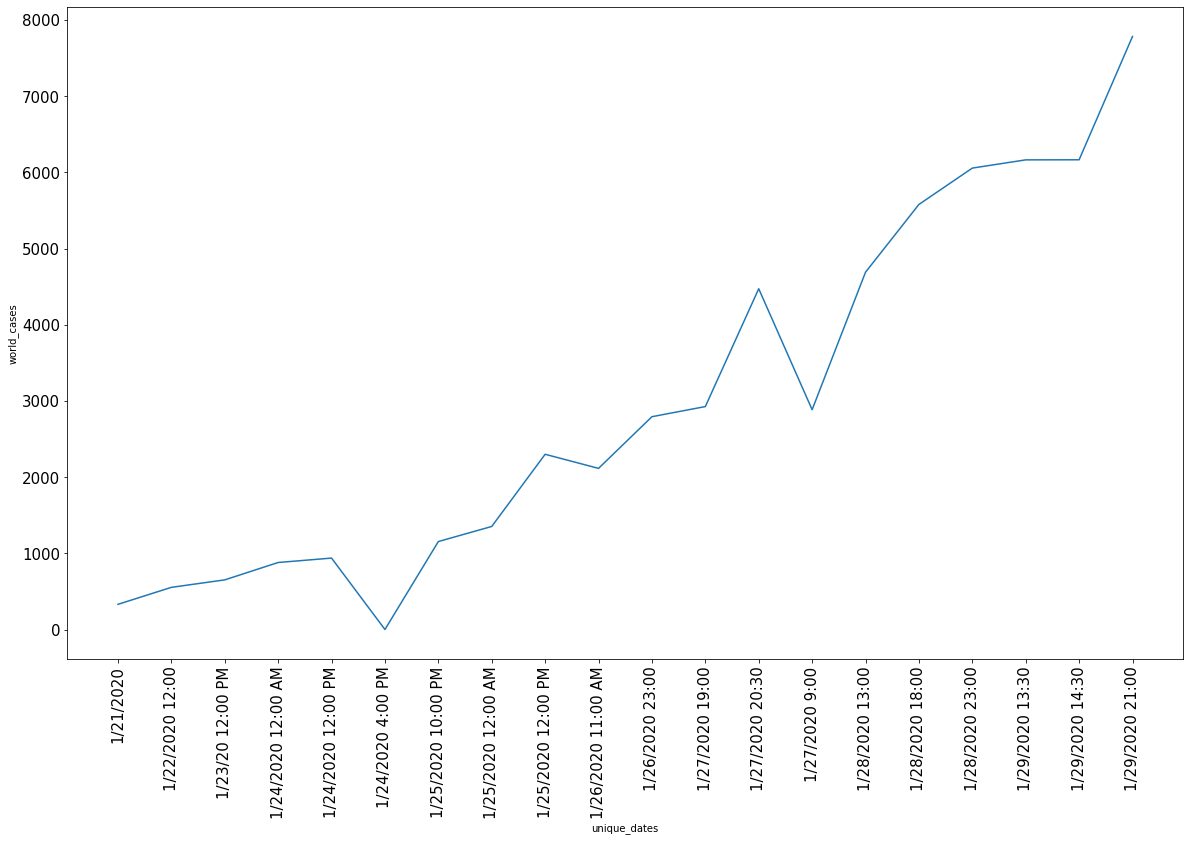

In [173]:
plt.figure(figsize=(20, 12))
plt.plot(unique_dates, world_cases)
plt.xlabel('unique_dates')
plt.ylabel('world_cases')
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.show()

* Remove redundant time
    * 누적 확진자 수가 줄어든 시간대를 지워준다.

* 모든 시간대에서 그림을 그려보니 1/24/2020 4:00 PM, 1/26/2020 11:00 AM, 1/27/2020 9:00에서 누적이 오히려 감소하는 것을 볼 수 있다.
* 위의 3가지 시간대를 제거해준다.

In [174]:
unique_dates

['1/21/2020',
 '1/22/2020 12:00',
 '1/23/20 12:00 PM',
 '1/24/2020 12:00 AM',
 '1/24/2020 12:00 PM',
 '1/24/2020 4:00 PM',
 '1/25/2020 10:00 PM',
 '1/25/2020 12:00 AM',
 '1/25/2020 12:00 PM',
 '1/26/2020 11:00 AM',
 '1/26/2020 23:00',
 '1/27/2020 19:00',
 '1/27/2020 20:30',
 '1/27/2020 9:00',
 '1/28/2020 13:00',
 '1/28/2020 18:00',
 '1/28/2020 23:00',
 '1/29/2020 13:30',
 '1/29/2020 14:30',
 '1/29/2020 21:00']

excess_time = [1/24/2020 4:00 PM, 1/26/2020 11:00 AM, 1/27/2020 9:00]

In [175]:
excess_time = ['1/24/2020 4:00 PM', '1/26/2020 11:00 AM', '1/27/2020 9:00']

In [176]:
for i in excess_time:
#     print(i)
    unique_dates.remove(i)

unique_dates

['1/21/2020',
 '1/22/2020 12:00',
 '1/23/20 12:00 PM',
 '1/24/2020 12:00 AM',
 '1/24/2020 12:00 PM',
 '1/25/2020 10:00 PM',
 '1/25/2020 12:00 AM',
 '1/25/2020 12:00 PM',
 '1/26/2020 23:00',
 '1/27/2020 19:00',
 '1/27/2020 20:30',
 '1/28/2020 13:00',
 '1/28/2020 18:00',
 '1/28/2020 23:00',
 '1/29/2020 13:30',
 '1/29/2020 14:30',
 '1/29/2020 21:00']

* 이제 일별 확진자 수의 증가 추이를 눈으로 확인할 수 있게 되었다

In [177]:
# 전 세계에서 발생하고 있는 확진자수를 일별로 집계해보자
# How?

world_cases = []  # 일별 확진자수의 총 합을 집계할 수 있도록 리스트를 만들어준다.

for date in unique_dates:
    world_cases.append(data[data['Last Update'] == date].Confirmed.sum())

world_cases

[332.0,
 555.0,
 653.0,
 881.0,
 939.0,
 1156.0,
 1354.0,
 2301.0,
 2794.0,
 2927.0,
 4473.0,
 4690.0,
 5579.0,
 6056.0,
 6164.0,
 6165.0,
 7783.0]

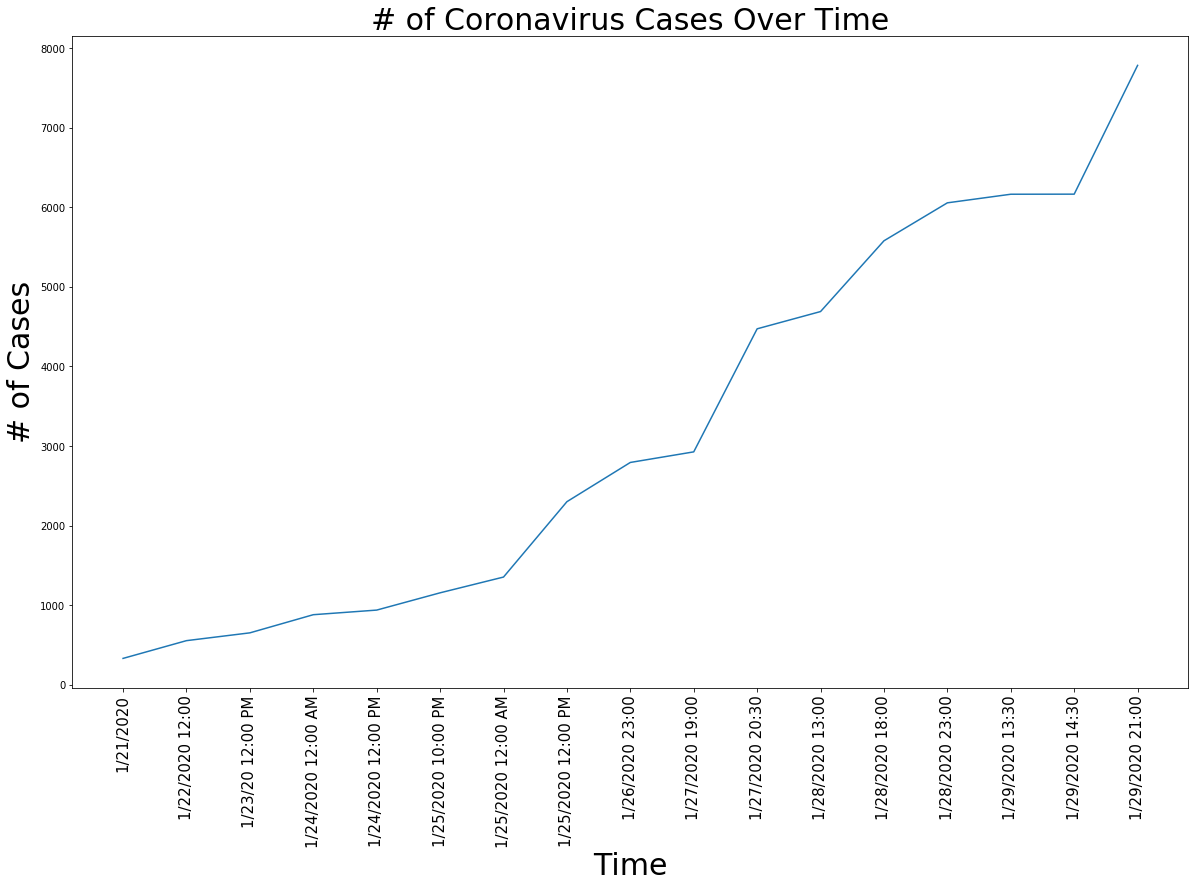

In [178]:
plt.figure(figsize=(20, 12))
plt.plot(unique_dates, world_cases)
plt.title('# of Coronavirus Cases Over Time', size = 30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(rotation=90, size=15)
plt.show()

In [179]:
world_cases = []

for i in unique_dates:
    world_cases.append(data[data['Last Update'] == i].Confirmed.sum())
    
print(unique_dates, world_cases)

['1/21/2020', '1/22/2020 12:00', '1/23/20 12:00 PM', '1/24/2020 12:00 AM', '1/24/2020 12:00 PM', '1/25/2020 10:00 PM', '1/25/2020 12:00 AM', '1/25/2020 12:00 PM', '1/26/2020 23:00', '1/27/2020 19:00', '1/27/2020 20:30', '1/28/2020 13:00', '1/28/2020 18:00', '1/28/2020 23:00', '1/29/2020 13:30', '1/29/2020 14:30', '1/29/2020 21:00'] [332.0, 555.0, 653.0, 881.0, 939.0, 1156.0, 1354.0, 2301.0, 2794.0, 2927.0, 4473.0, 4690.0, 5579.0, 6056.0, 6164.0, 6165.0, 7783.0]


Looking at the latest confirmed data

In [196]:
latest_date = '1/29/2020 21:00'

data[data['Last Update']==latest_date]

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/29/2020 21:00,4586.0,NaN,90.0,162.0
1,Zhejiang,Mainland China,1/29/2020 21:00,428.0,NaN,4.0,NaN
2,Guangdong,Mainland China,1/29/2020 21:00,311.0,NaN,6.0,NaN
3,Henan,Mainland China,1/29/2020 21:00,278.0,NaN,2.0,2.0
4,Hunan,Mainland China,1/29/2020 21:00,277.0,NaN,NaN,NaN
5,Anhui,Mainland China,1/29/2020 21:00,200.0,NaN,2.0,NaN
6,Chongqing,Mainland China,1/29/2020 21:00,165.0,NaN,1.0,NaN
7,Jiangxi,Mainland China,1/29/2020 21:00,162.0,NaN,4.0,NaN
8,Shandong,Mainland China,1/29/2020 21:00,145.0,NaN,1.0,NaN
9,Sichuan,Mainland China,1/29/2020 21:00,142.0,NaN,1.0,1.0


Find countries/territories that have confirmed cases

In [181]:
# number of cases per Country/Region
unique_countries = data['Country/Region'].unique()
unique_countries.sort()
print(unique_countries)
print(len(unique_countries))


['Australia' 'Brazil' 'Cambodia' 'Canada' 'Colombia' 'Finland' 'France'
 'Germany' 'Hong Kong' 'Ivory Coast' 'Japan' 'Macau' 'Mainland China'
 'Malaysia' 'Mexico' 'Nepal' 'Philippines' 'Singapore' 'South Korea'
 'Sri Lanka' 'Taiwan' 'Thailand' 'United Arab Emirates' 'United States'
 'Vietnam']
25


29일 21:00(현지시각)기준 25개 국가에서 확진자가 발생했다. <br/>
그렇다면 국가별로 확진자 수는 어떨까?

In [183]:
latest_data = data[data['Last Update'] == latest_date]

In [195]:
latest_data

,Province/State,Country/Region,Last Update,Confirmed,Suspected,Recovered,Death
0,Hubei,Mainland China,1/29/2020 21:00,4586.0,NaN,90.0,162.0
1,Zhejiang,Mainland China,1/29/2020 21:00,428.0,NaN,4.0,NaN
2,Guangdong,Mainland China,1/29/2020 21:00,311.0,NaN,6.0,NaN
3,Henan,Mainland China,1/29/2020 21:00,278.0,NaN,2.0,2.0
4,Hunan,Mainland China,1/29/2020 21:00,277.0,NaN,NaN,NaN
5,Anhui,Mainland China,1/29/2020 21:00,200.0,NaN,2.0,NaN
6,Chongqing,Mainland China,1/29/2020 21:00,165.0,NaN,1.0,NaN
7,Jiangxi,Mainland China,1/29/2020 21:00,162.0,NaN,4.0,NaN
8,Shandong,Mainland China,1/29/2020 21:00,145.0,NaN,1.0,NaN
9,Sichuan,Mainland China,1/29/2020 21:00,142.0,NaN,1.0,1.0


In [197]:
for country in unique_countries:
    print(country)

Australia
Brazil
Cambodia
Canada
Colombia
Finland
France
Germany
Hong Kong
Ivory Coast
Japan
Macau
Mainland China
Malaysia
Mexico
Nepal
Philippines
Singapore
South Korea
Sri Lanka
Taiwan
Thailand
United Arab Emirates
United States
Vietnam


In [213]:
countries_confirmed_num = []  # 국가별 확진자 수
countries_list = []
# 국가별 확진자 수를 그래프로 파악해보자!

for country in unique_countries:
    countries_list.append(country)
    countries_confirmed_num.append(latest_data[latest_data['Country/Region'] == country].Confirmed.sum())
#     print(countries_confirmed_num)
 
    
print('='*20)
print(countries_list)
print(countries_confirmed_num) # 국가별 1월 29일 확진자 수의 리스트를 얻을 수 있다.


['Australia', 'Brazil', 'Cambodia', 'Canada', 'Colombia', 'Finland', 'France', 'Germany', 'Hong Kong', 'Ivory Coast', 'Japan', 'Macau', 'Mainland China', 'Malaysia', 'Mexico', 'Nepal', 'Philippines', 'Singapore', 'South Korea', 'Sri Lanka', 'Taiwan', 'Thailand', 'United Arab Emirates', 'United States', 'Vietnam']
[7.0, 0.0, 1.0, 3.0, 0.0, 1.0, 5.0, 4.0, 10.0, 0.0, 11.0, 7.0, 7678.0, 7.0, 0.0, 1.0, 0.0, 10.0, 4.0, 1.0, 8.0, 14.0, 4.0, 5.0, 2.0]


In [221]:
print(len(countries_list))
print(len(countries_confirmed_num))

25
25


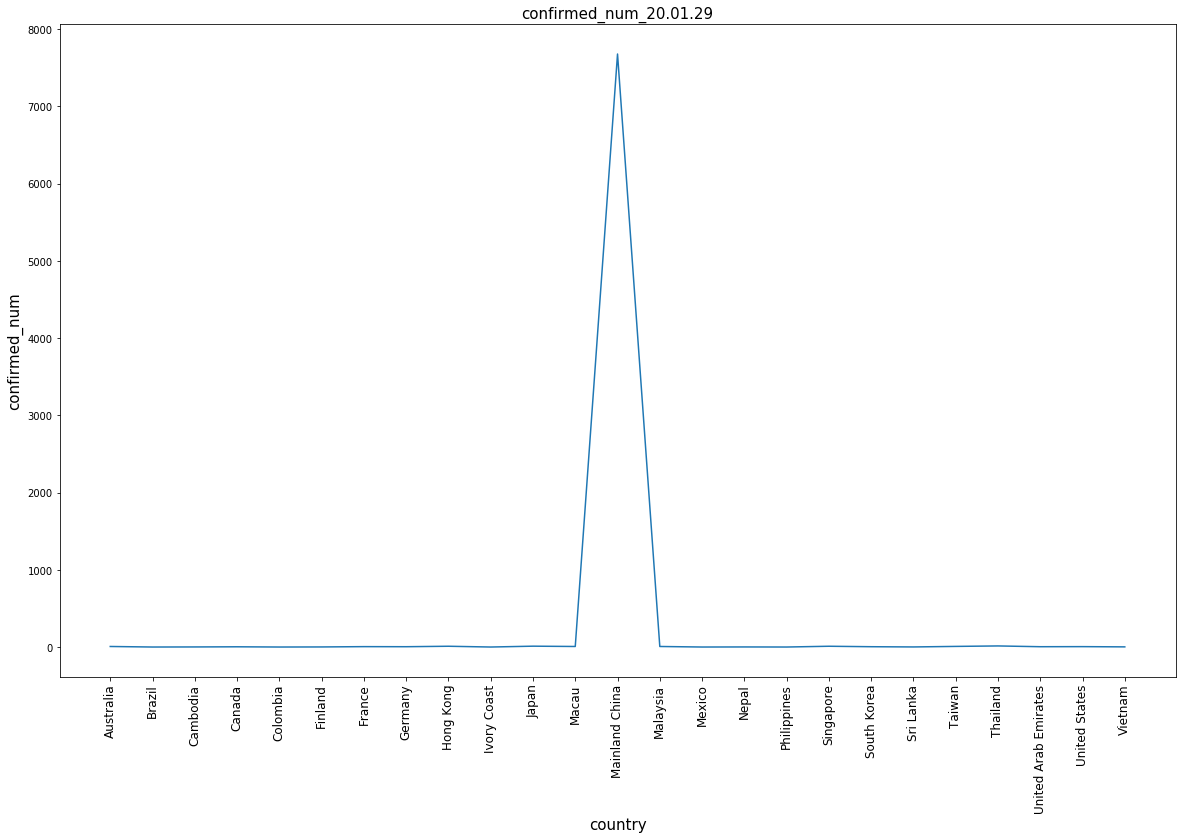

In [226]:
plt.figure(figsize=(20, 12))
plt.plot(countries_list, countries_confirmed_num)
plt.title("confirmed_num_20.01.29", size=15)
plt.xlabel("country", size=15)
plt.ylabel("confirmed_num", size=15)
plt.xticks(rotation=90, size=12)
plt.show()

가운데로 볼록한 Mainland China

In [217]:
country_confirmed_zip = list(zip(countries_list, countries_confirmed_num))
country_confirmed_zip

[('Australia', 7.0),
 ('Brazil', 0.0),
 ('Cambodia', 1.0),
 ('Canada', 3.0),
 ('Colombia', 0.0),
 ('Finland', 1.0),
 ('France', 5.0),
 ('Germany', 4.0),
 ('Hong Kong', 10.0),
 ('Ivory Coast', 0.0),
 ('Japan', 11.0),
 ('Macau', 7.0),
 ('Mainland China', 7678.0),
 ('Malaysia', 7.0),
 ('Mexico', 0.0),
 ('Nepal', 1.0),
 ('Philippines', 0.0),
 ('Singapore', 10.0),
 ('South Korea', 4.0),
 ('Sri Lanka', 1.0),
 ('Taiwan', 8.0),
 ('Thailand', 14.0),
 ('United Arab Emirates', 4.0),
 ('United States', 5.0),
 ('Vietnam', 2.0)]

* 학습한 zip(), dictionary()를 활용해보자
* Building Dictionaries

In [218]:
country_confirm_dict = dict(zip(countries_list, countries_confirmed_num))
country_confirm_dict

{'Australia': 7.0,
 'Brazil': 0.0,
 'Cambodia': 1.0,
 'Canada': 3.0,
 'Colombia': 0.0,
 'Finland': 1.0,
 'France': 5.0,
 'Germany': 4.0,
 'Hong Kong': 10.0,
 'Ivory Coast': 0.0,
 'Japan': 11.0,
 'Macau': 7.0,
 'Mainland China': 7678.0,
 'Malaysia': 7.0,
 'Mexico': 0.0,
 'Nepal': 1.0,
 'Philippines': 0.0,
 'Singapore': 10.0,
 'South Korea': 4.0,
 'Sri Lanka': 1.0,
 'Taiwan': 8.0,
 'Thailand': 14.0,
 'United Arab Emirates': 4.0,
 'United States': 5.0,
 'Vietnam': 2.0}

In [219]:
country_confirm_dict['South Korea']

4.0

In [220]:
# 엇그제 까지만 해도 확진자는 불과 4명이었는데...!